# Visualizing the Hidden Activity of a CNN

Author: YinTaiChen

Reference 1: http://www.cs.rug.nl/~alext/PAPERS/VAST16/paper.pdf

Reference 2: http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Reference 3: https://www.datacamp.com/community/tutorials/scikit-learn-python

In data visualization, dimensionality reduction has been successfully used to compute projections: representation of high-dimentional data in lower-dimensional spaces that try to preserve the data structure.

Let's explore the potential of PCA, a dimensionality reduction technique to provide insightful visual feedback about CNN.

For this experiment, we will use the CIFAR10 dataset.

![title](http://pytorch.org/tutorials/_images/cifar10.png)

# Firstly, import everything

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

# Loading and normalizing CIFAR10

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]

The batch size of the testloader should be set to one.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.

 ship   dog  bird truck


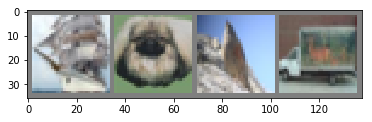

In [3]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Define a Convolution Neural Network

It is just a simple CNN with 2 convolution layers and 3 fully connected layers.

Besides the final ouput x, the CNN will also reutrn a list of 4 feature vectors.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        feature_1 = self.pool(F.relu(self.conv1(x)))
        feature_2 = self.pool(F.relu(self.conv2(feature_1)))
        x = feature_2.view(-1, 16 * 5 * 5)
        feature_3 = F.relu(self.fc1(x))
        feature_4 = F.relu(self.fc2(feature_3))
        x = self.fc3(feature_4)
        return x, [feature_1, feature_2, feature_3, feature_4]


net = Net()

# Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize

In [7]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs[0], labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.118
[1,  4000] loss: 1.816
[1,  6000] loss: 1.663
[1,  8000] loss: 1.574
[1, 10000] loss: 1.521
[1, 12000] loss: 1.458
[2,  2000] loss: 1.404
[2,  4000] loss: 1.353
[2,  6000] loss: 1.345
[2,  8000] loss: 1.287
[2, 10000] loss: 1.294
[2, 12000] loss: 1.275
[3,  2000] loss: 1.211
[3,  4000] loss: 1.233
[3,  6000] loss: 1.190
[3,  8000] loss: 1.194
[3, 10000] loss: 1.139
[3, 12000] loss: 1.160
[4,  2000] loss: 1.082
[4,  4000] loss: 1.087
[4,  6000] loss: 1.102
[4,  8000] loss: 1.094
[4, 10000] loss: 1.110
[4, 12000] loss: 1.114
[5,  2000] loss: 1.020
[5,  4000] loss: 1.027
[5,  6000] loss: 1.046
[5,  8000] loss: 1.034
[5, 10000] loss: 1.043
[5, 12000] loss: 1.036
[6,  2000] loss: 0.957
[6,  4000] loss: 0.974
[6,  6000] loss: 0.999
[6,  8000] loss: 0.977
[6, 10000] loss: 0.999
[6, 12000] loss: 1.005
[7,  2000] loss: 0.894
[7,  4000] loss: 0.905
[7,  6000] loss: 0.950
[7,  8000] loss: 0.952
[7, 10000] loss: 0.959
[7, 12000] loss: 0.963
[8,  2000] loss: 0.886
[8,  4000] 

[58,  6000] loss: 0.604
[58,  8000] loss: 0.638
[58, 10000] loss: 0.631
[58, 12000] loss: 0.677
[59,  2000] loss: 0.562
[59,  4000] loss: 0.589
[59,  6000] loss: 0.632
[59,  8000] loss: 0.650
[59, 10000] loss: 0.668
[59, 12000] loss: 0.693
[60,  2000] loss: 0.572
[60,  4000] loss: 0.613
[60,  6000] loss: 0.636
[60,  8000] loss: 0.675
[60, 10000] loss: 0.636
[60, 12000] loss: 0.679
[61,  2000] loss: 0.539
[61,  4000] loss: 0.569
[61,  6000] loss: 0.619
[61,  8000] loss: 0.665
[61, 10000] loss: 0.658
[61, 12000] loss: 0.672
[62,  2000] loss: 0.552
[62,  4000] loss: 0.595
[62,  6000] loss: 0.595
[62,  8000] loss: 0.619
[62, 10000] loss: 0.680
[62, 12000] loss: 0.705
[63,  2000] loss: 0.601
[63,  4000] loss: 0.556
[63,  6000] loss: 0.605
[63,  8000] loss: 0.628
[63, 10000] loss: 0.691
[63, 12000] loss: 0.669
[64,  2000] loss: 0.557
[64,  4000] loss: 0.604
[64,  6000] loss: 0.645
[64,  8000] loss: 0.645
[64, 10000] loss: 0.668
[64, 12000] loss: 0.641
[65,  2000] loss: 0.555
[65,  4000] loss

# Extract features from the test data

Okay, now let us see what the neural network has extracted for us:

In [8]:
dataiter = iter(testloader)
image, label = dataiter.next()
output, features = net(Variable(image))

for f in features:
    print(f)

Variable containing:
(0 ,0 ,.,.) = 
  0.8819  0.5208  0.3361  ...   1.7847  2.0187  1.9583
  2.6390  3.2447  0.2671  ...   0.0000  1.0607  2.8898
  4.7071  3.9066  1.0296  ...   0.0000  0.0000  3.1976
           ...             ⋱             ...          
  1.9650  4.0922  6.9110  ...   0.0000  0.0000  0.0000
  0.0000  4.6489  6.8171  ...   0.0000  0.0000  0.0000
  0.0000  0.1509  0.6111  ...   0.4893  0.0000  0.0000

(0 ,1 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
           ...             ⋱             ...          
  6.3433  4.8325  1.0863  ...   4.8635  5.0721  4.7906
  5.2966  6.4373  6.8945  ...   5.5993  5.7207  7.0473
  5.3911  5.5992  6.7417  ...   4.5741  4.9976  6.4354

(0 ,2 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.00

Collect all the features:

In [22]:
predicted_list = []
feature_1_list = []
feature_2_list = []
feature_3_list = []
feature_4_list = []

for data in testloader:
    images, _ = data
    outputs, features = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    predicted_list.append(int(predicted[0]))
    feature_1_list.append(features[0].data.view(1,-1))
    feature_2_list.append(features[1].data.view(1,-1))
    feature_3_list.append(features[2].data.view(1,-1))
    feature_4_list.append(features[3].data.view(1,-1))

In [31]:
feature_1 = torch.stack(feature_1_list, dim=0).view(10000, -1).numpy()
feature_2 = torch.stack(feature_2_list, dim=0).view(10000, -1).numpy()
feature_3 = torch.stack(feature_3_list, dim=0).view(10000, -1).numpy()
feature_4 = torch.stack(feature_4_list, dim=0).view(10000, -1).numpy()

# Principal Component Analysis, PCA

In [14]:
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA

In [33]:
pca = PCA(2)
projected_1 = pca.fit_transform(feature_1)
projected_2 = pca.fit_transform(feature_2)
projected_3 = pca.fit_transform(feature_3)
projected_4 = pca.fit_transform(feature_4)

## Conv_1 Feature Visualization

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


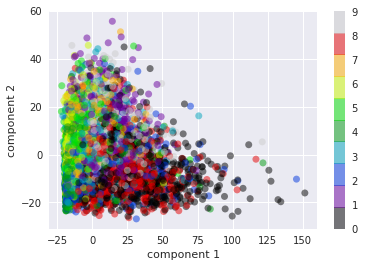

In [34]:
plt.scatter(projected_1[:, 0], projected_1[:, 1],
            c=predicted_list, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Conv_2 Feature Visualization

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


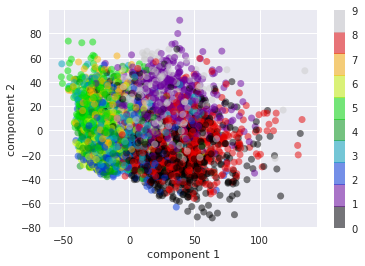

In [35]:
plt.scatter(projected_2[:, 0], projected_2[:, 1],
            c=predicted_list, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Fc_1 Feature Visualization

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


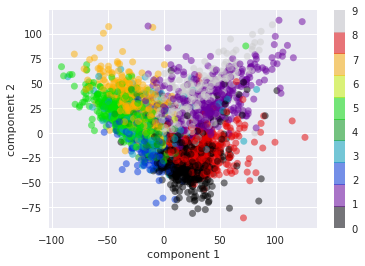

In [36]:
plt.scatter(projected_3[:, 0], projected_3[:, 1],
            c=predicted_list, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Fc_2 Feature Visualization

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


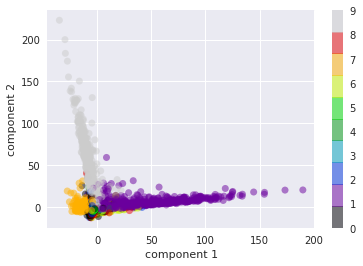

In [37]:
plt.scatter(projected_4[:, 0], projected_4[:, 1],
            c=predicted_list, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();